In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torch.nn.functional as F
import pickle
import itertools
import tqdm
# import hypergrad as hg
from mlmodel import *
import utils
import numpy as np
from sparsemax import Sparsemax
from argparse import ArgumentParser
from ZSTL_model import ZSTL

In [2]:
net = FuncRecursiveNet([
    FLinearLayer(1, True)
])
shape_record = {0: [(1, 9719)]}

In [3]:
path_data = '../ZSTL_Data/hetrec2011-lastfm-2k/extracted_feature/'
compressed_data = 'sampled_task.pickle'
detailed_data = 'detailed_data.pickle'

with open(path_data+compressed_data, 'rb') as f:
    compressed_dataset = pickle.load(f)

with open(path_data+detailed_data, 'rb') as f:
    detailed_dataset = pickle.load(f)

In [4]:
total_len = len(compressed_dataset)
print('tot_len ', total_len, compressed_dataset[2])
support_size = 150
test_size = int(total_len*0.2)
train_size = int(total_len - support_size - test_size)
support_loader, train_loader, test_loader = utils.genSplits_hectrec(compressed_dataset, detailed_dataset, train_size, test_size, support_size)

tot_len  1892 (0, array([[-1.72784869,  0.50704983,  0.30139832, ...,  0.        ,
         0.        ,  0.        ]]), array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49, 10556, 14767,  1654,  9267,
        7242,  3435,  5862,  8099,  3307,  3973,  9003,  7807, 17251,
       16162, 14519,  1073,  4214,  1393, 12544,  9680, 10355,  3158,
        2921, 12854,  3927,  6533, 13634, 10059,  3989,  7949, 14261,
        4394,  6692, 15157,  2093,  2457,  3482, 16200, 15700,  8771,
       15223, 17363,  7165,  7816,   926, 16911,   574,   409,  5483,
        7275]))
150
1364
378


12523
9719
{'rho': 1e-05, 'mu': 1e-05, 'loss': 'binary class', 'outer lr': 0.001, 'align lr': 0.0001, 'dm': 12523, 'd': 9719, 'model_shape': {0: [(1, 9719)]}, 'atten_activation': 'Sparsemax'}
init mean test metric 0.7328835978835982; align loss 0.7754985690116882
1/500 o_loss 0.9197489771246911; m train metric 0.7226; m test metric 0.7335449735449737; align loss  0.7754731774330139
10/500 o_loss 0.8840912517905235; m train metric 0.7511999999999999; m test metric 0.7380687830687827; align loss  0.7751775979995728
20/500 o_loss 0.764978907816112; m train metric 0.7437999999999999; m test metric 0.7452380952380955; align loss  0.7749022841453552
30/500 o_loss 0.7509150353819132; m train metric 0.7528000000000001; m test metric 0.7513492063492071; align loss  0.7744597792625427
40/500 o_loss 0.6844988855347037; m train metric 0.7686999999999997; m test metric 0.7548148148148153; align loss  0.7744126915931702
50/500 o_loss 0.668270352743566; m train metric 0.7741; m test metric 0.75804232

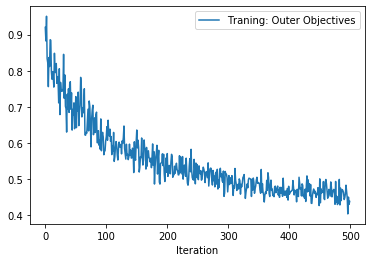

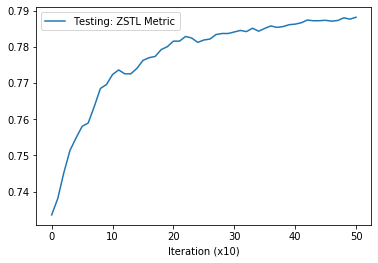

0

In [5]:
support_a, support_w, support_x, support_y = next(iter(support_loader))
support_a, support_w, support_x, support_y = support_a.float(), support_w.float(), support_x.float(), support_y.float()
support_a = support_a.squeeze().t()
support_w = support_w.squeeze().t()
dm = support_a.size()[0]
print(dm)
d  = support_w.size()[0]
print(d)

param_dict = {}
param_dict['rho'] = 1e-5
param_dict['mu'] = 1e-5
param_dict['loss'] = 'binary class'
param_dict['outer lr'] = 1e-3
param_dict['align lr'] = 1e-4
param_dict['dm'] = dm
param_dict['d'] = d
param_dict['model_shape'] = shape_record
param_dict['atten_activation'] = 'Sparsemax'
print(param_dict)


ZSTL_model = ZSTL(support_w, support_a, support_x, net, param_dict)
ZSTL_model.train(train_loader, test_loader, max_iter=500)
